### The Ramsey-Cass-Koopmans Model

Seho Jeong, Sogang University

References:
- **Kwak, Jun Hee. 2025.** "Lectures on Macroeconomics." Sogang University.
- **Sargent, Thomas J. and John Stachurski. n.d.** "Cass-Koopmans Model." A First Course in Quantitative Economics with Python. https://intro.quantecon.org/cons_smooth.html
- **Sargent, Thomas J. and John Stachurski. n.d.** "Cass-Koopmans Competitive Equilibrium." A First Course in Quantitative Economics with Python. https://intro.quantecon.org/cons_smooth.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define customized colormap for plots.
cm = ['#116FA1', '#2DC0D2', '#E0B266', '#00979F', '#70CAC6', '#005A7D']
bg = '#F9F9F9'

In [ ]:
##### Social Planner's Planning Problem #####

# I - Set parameters.

γ = 2.0  # coefficient of relative risk aversion
β = 0.95 # discount factor
δ = 0.02 # depreciation rate on capital
α = 0.33 # return to capital per capita
A = 1.0  # technology


# II - Define utility of HHs and technology of firms.

def u(c):
    """
    utility function
    """
    return (c ** (1 - γ) - 1) / (1 - γ) if γ != 1 else np.log(c)

def mu(c):
    """
    marginal utility w.r.t. consumption
    """
    return c ** (-γ)

def mu_inv(c):
    """ 
    Inverse of marginal utility
    """
    return c ** (-1 / γ)

def f(k):
    """
    output per-capita production function
    """
    return A * k ** α

def mpk(k):
    """ 
    marginal product w.r.t. per-capita capital
    """
    return α * A * k ** (α - 1)

def mpk_inv(k):
    """ 
    inverse of marginal product w.r.t. capital per-capita
    """
    return (k / (α * A)) ** (1 / (α - 1)) 

def next_k_and_c(k, c):
    """ 
    Given the current capital Kt and an arbitrary feasible consumption choice Ct,
    computes Kt+1 by state transition lwa and optimal Ct+1 by Euler equation.
    """
    k_next = f(k) + (1 - δ) * k - c # from law of motion
    c_next = mu_inv(mu(c) / (β * (1 + mpk(k_next) - δ)))
    return k_next, c_next


# III - Shooting algorithm

def shooting(c0, k0, T=10):
    """ 
    Given the initial condition of capital k0 and an initial guess of consumption c0,
    computes the whole paths of c an k using the state transition law and Euler equation for T periods.
    """
    assert c0 <= f(k0) + (1 - δ) * k0, 'Initial consumption is not feasible.'

    # Initialize vectors of c and k.
    c_vec = np.empty(T+1)
    k_vec = np.empty(T+2)

    c_vec[0] = c0
    k_vec[0] = k0

    for t in range(T):
        k_vec[t+1], c_vec[t+1] = next_k_and_c(k_vec[t], c_vec[t])

    k_vec[T+1] = f(k_vec[T]) + (1 - δ) * k_vec[T] - c_vec[T]

    return c_vec, k_vec

def bisection(c0, k0, T=10, tol=1e-4, max_iter=500, k_terminal=0.0, verbose=True):

    # initial boundaries for guess c0
    c0_upper = f(k0)
    c0_lower = 0.0

    for iteration in range(max_iter):

        c_vec, k_vec = shooting(c0, k0, T)
        error = k_vec[-1] - k_terminal

        # Check if the terminal condition is satisfied.
        if np.abs(error) < tol:
            if verbose:
                print('Converged successfully on iteration', iteration+1)
            break

        if iteration + 1 == max_iter:
            if verbose:
                print('Convergence failed with error', error)
            break
        
        # Update boundary values for c0
        if error > 0:
            c0_lower = c0
        else:
            c0_upper = c0
        
        c0 = (c0_lower + c0_upper) / 2
    
    return c_vec, k_vec

# # Begin with an incorrect guess of consumption.
# k0 = 0.3
# c0_init = 0.2
# paths = shooting(c0_init, k0, T=10)

# # Plot the path of consumption and future capital.
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# # LEFT PANEL
# ax1.plot(paths[0], color=colors[0])

# ax1.set_title('Consumption')
# ax1.set_facecolor(bg)
# ax1.set_xlabel('$t$')
# ax1.set_ylabel('$c_t$')
# ax1.set_xmargin(0)

# # RIGHT PANEL
# ax2.plot(paths[1], color=colors[1])
# ax2.axhline(0.0, color='k', ls='--', lw=1)

# ax2.set_title('Capital')
# ax2.set_facecolor(bg)
# ax2.set_xlabel('$t$')
# ax2.set_ylabel('$k_t$')
# ax2.set_xmargin(0)

# plt.show()

def plot_paths(c0, k0, T_arr, k_terminal=0, k_ss=None, ax=None):
    
    if ax is None:
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))

    ylabels = [r'$c_t$', r'$k_t$', r'$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    c_paths = []
    k_paths = []

    for T in T_arr:

        c_vec, k_vec = bisection(c0, k0, T, k_terminal=k_terminal, verbose=False)
        c_paths.append(c_vec)
        k_paths.append(k_vec)
        μ_vec = mu(c_vec)
        paths = [c_vec, k_vec, μ_vec]

        for i in range(3):
            axs[i].plot(paths[i], color=colors[i])
            axs[i].set(xlabel='$t$', 
                       ylabel=ylabels[i],
                       title=titles[i],
                       facecolor=bg)
            
        # Plot steady state value of capital.
        if k_ss is not None:
            axs[1].axhline(k_ss, color='k', ls='--', lw=1)

        axs[1].axvline(T+1, color='k', ls='--', lw=1)
        axs[1].scatter(T+1, paths[1][-1], s=80, color=colors[1])
    
    fig.tight_layout()
    plt.show()

    return c_paths, k_paths

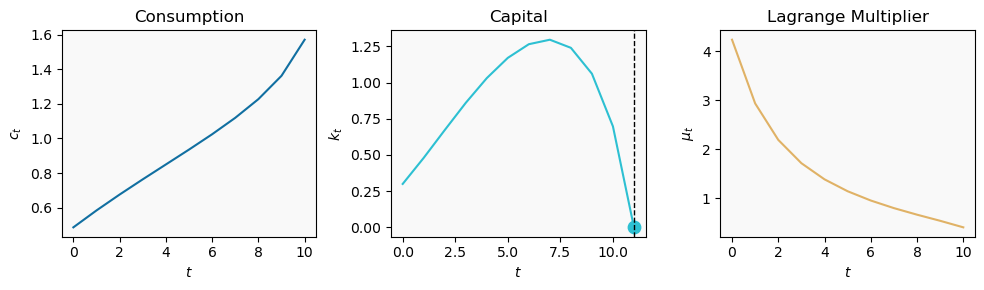

([array([0.48574024, 0.58356735, 0.6755383 , 0.76359572, 0.84964636,
         0.93576284, 1.02452871, 1.11969764, 1.2277586 , 1.36284366,
         1.57171478])],
 [array([3.00000000e-01, 4.80384709e-01, 6.72308675e-01, 8.60522291e-01,
         1.03135353e+00, 1.17131994e+00, 1.26569957e+00, 1.29671603e+00,
         1.24061310e+00, 1.06178439e+00, 6.97685821e-01, 6.69433900e-06])])

In [40]:
plot_paths(0.3, 0.3, [10])

#### Infinite-Horizon Model

In [46]:
# Set parameters.

α = 1/3         # capital's share in production function
β = 0.95        # time discount factor
δ = 0.05        # depriciation rate
σ = 1           # CRRA parameter
ρ = (1 / β) - 1 # implied rate of time preference

kstar = (α / (ρ + δ)) ** (1 / (1 - α)) # steady state
kbar = (1 / δ) ** (1 / (1 - α))

max_iter = 500  # maximum number of iterations
tol = 1e-7

# utility function
def utility(c):
    if σ == 1:
        return np.where(c > 0, np.log(c), -np.inf)
    return np.where(c > 0, (c ** (1 - σ) - 1) / (1 - σ), -np.inf)

# Set up grids.
kmin = tol  # effectively zero
kmax = kbar # effectively upper bound on a grid
knum = 1001 # number of nodes for a grid

kgrid = np.linspace(kmin, kmax, knum)

# Get return functions.

c = np.zeros((knum, knum))

for j in range(knum):
    c[:, j] = kgrid ** α + (1 - δ) * kgrid - kgrid[j]

u = utility(c)

# Solve Bellman equation by VFI.

V = np.zeros_like(knum) # initial guess

for iteration in range(max_iter):

    # RHS of Bellman equation
    RHS = u + β * V
    TV = RHS.max(axis=1)
    idx = RHS.argmax(axis=1)
    g = kgrid[idx]

    # Check convergence.
    error = np.max(np.abs(TV - V))
    print(f'Iteration {iteration} - Error: {error}')

    if error < tol:
        print('Convergence achieved!')
        break

    V = TV

/var/folders/n5/bkphn15s0kzc1lsr8x64v8y00000gn/T/ipykernel_1704/1135983042.py:18: RuntimeWarning: invalid value encountered in log
  return np.where(c > 0, np.log(c), -np.inf)


Iteration 0 - Error: 5.372699627537365
Iteration 1 - Error: 5.104064646160497
Iteration 2 - Error: 4.848861413852472
Iteration 3 - Error: 4.606418343159847
Iteration 4 - Error: 4.376097426001856
Iteration 5 - Error: 4.157292554701762
Iteration 6 - Error: 3.9494279269666706
Iteration 7 - Error: 3.7519565306183438
Iteration 8 - Error: 3.564358704087425
Iteration 9 - Error: 3.3861407688830525
Iteration 10 - Error: 3.2168337304389
Iteration 11 - Error: 3.0559920439169517
Iteration 12 - Error: 2.903192441721103
Iteration 13 - Error: 2.758032819635048
Iteration 14 - Error: 2.6201311786532955
Iteration 15 - Error: 2.4891246197206343
Iteration 16 - Error: 2.3646683887346
Iteration 17 - Error: 2.246434969297873
Iteration 18 - Error: 2.1341132208329867
Iteration 19 - Error: 2.027407559791328
Iteration 20 - Error: 1.9260371818017745
Iteration 21 - Error: 1.8297353227116844
Iteration 22 - Error: 1.7382485565760817
Iteration 23 - Error: 1.651336128747289
Iteration 24 - Error: 1.5687693223099188
Ite

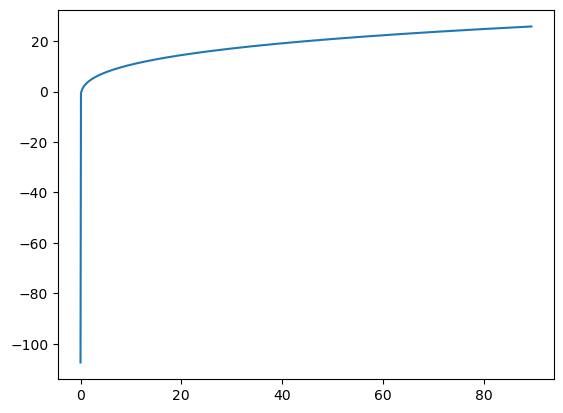

In [47]:
plt.plot(kgrid, V)